In [36]:
import pickle

from almc.bayesian_rescal import PFBayesianRescal
import numpy as np
from scipy.io import loadmat
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

In [37]:
def load_dataset(dataset):

    if dataset == 'umls':
        mat = loadmat('../data/%s/uml.mat' % (dataset))
        T = np.array(mat['Rs'], np.float32)
    elif dataset == 'nation':
        mat = loadmat('../data/%s/dnations.mat' % (dataset))
        T = np.array(mat['R'], np.float32)
    elif dataset == 'kinship':
        mat = loadmat('../data/%s/alyawarradata.mat' % (dataset))
        T = np.array(mat['Rs'], np.float32)
    elif dataset == 'wordnet':
        T = pickle.load(open('../data/%s/reduced_wordnet.pkl' % (dataset), 'rb'))

    if dataset != 'wordnet':
        T = np.swapaxes(T, 1, 2)
        T = np.swapaxes(T, 0, 1)  # [relation, entity, entity]
        T[np.isnan(T)] = 0
    return T

In [38]:
dataset = 'wordnet'
T = load_dataset(dataset)
n_relation, n_entity, _ = T.shape

In [39]:
n_relation

10

In [40]:
n_entity

836

<Container object of 10 artists>

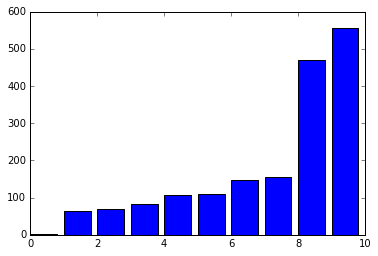

In [41]:
plt.bar(range(n_relation), sorted(np.sum(np.sum(T,1),1)))

## Outgoing degree distribution

<Container object of 836 artists>

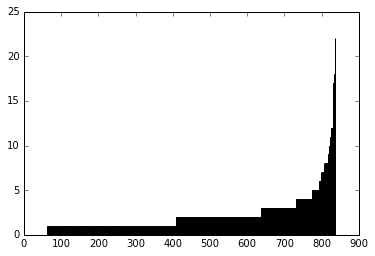

In [42]:
plt.bar(range(n_entity), sorted(np.sum(np.sum(T,0),1)))

## Incoming degree distribution

<Container object of 836 artists>

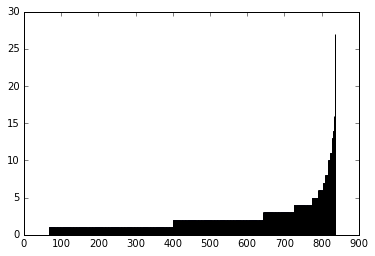

In [43]:
plt.bar(range(n_entity), sorted(np.sum(np.sum(T,0),0)))